In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.pandas.set_option('display.max_columns',None) # See all the columns .


In [3]:
df = pd.read_csv('GYM Data.csv')

In [14]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [15]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [22]:
df.dtypes

number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object

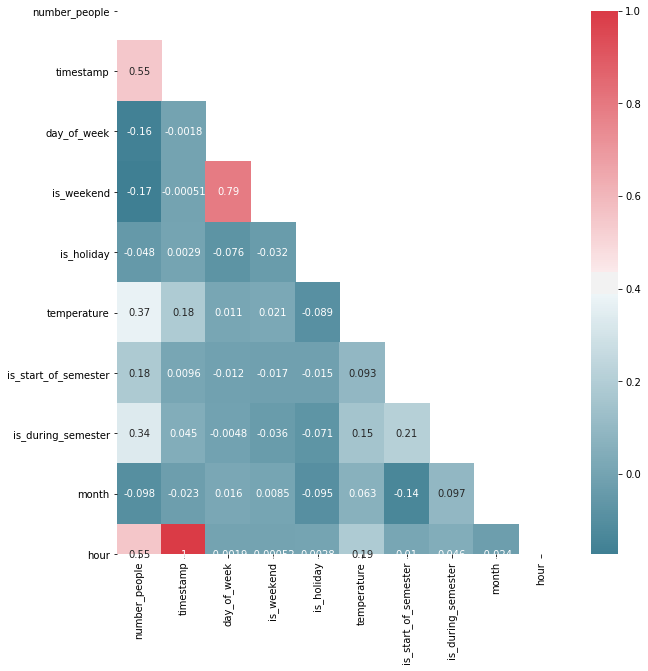

In [21]:
# Triangle Lower Heatmap
# In this  heatmap we can easily see the relation or correlation between the features.
corr = df.corr()
mask = np.triu(np.ones_like(corr , dtype = np.bool))
f,ax = plt.subplots(figsize =(10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)
sns.heatmap(corr , mask = mask , cmap = cmap , annot = True  )

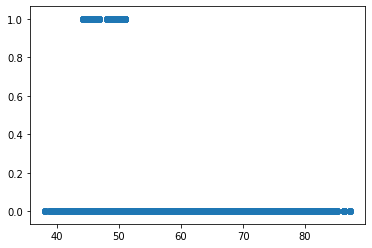

In [23]:
x = df['temperature']
y = df['is_holiday']
plt.scatter(x,y)

In [30]:
farenhite = df['temperature']
f = farenhite.tolist()

In [35]:
C = map(lambda x:(float(5)/9)*(x-32),f)
celsius = list(C)

In [36]:
temperature_celcius = pd.Series(celsius)

In [37]:
df['temperature'] = temperature_celcius

In [39]:
df['temperature']
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,22.088889,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,22.088889,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,22.088889,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,22.088889,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,22.088889,0,0,8,17


In [85]:
X = df.iloc[:,2:8]
Y = df.iloc[:,0]

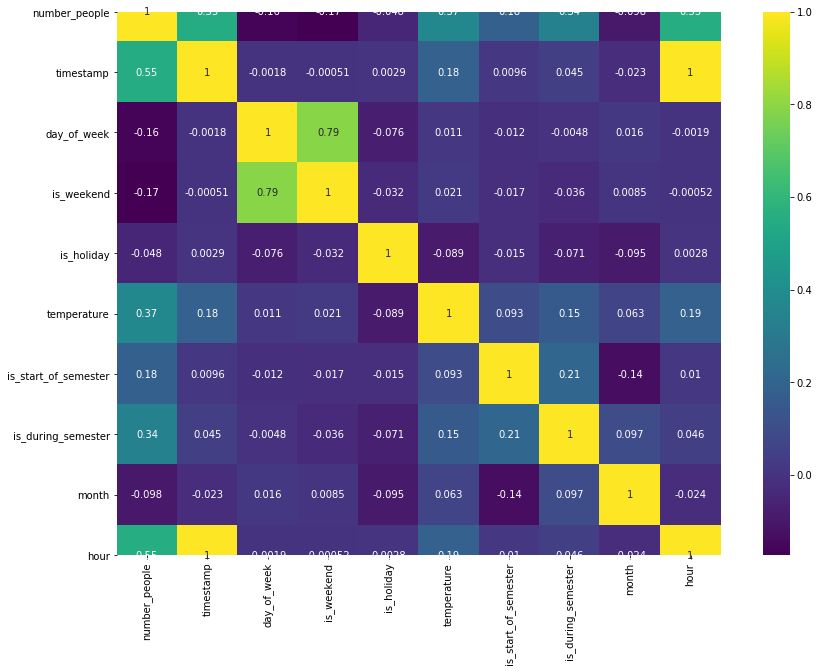

In [86]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr ,vmax= 1,square = True,cmap = 'viridis',annot = True)

In [87]:
# We need to standardize the data because for PCA we have to standardize the data, benefit of standardize the data is avoid numeric precision error.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.63654993,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       [ 0.68623792,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       [ 0.71106127,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       ...,
       [ 0.94008862,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482],
       [ 0.96515979,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482],
       [ 0.99010704,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482]])

In [89]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-0.01221225, -1.74827045,  0.50960639, -0.41110148,  1.15793497,
         0.83101258],
       [-0.01252094, -1.77681605,  0.53746942, -0.41502514,  1.12857183,
         0.83090197],
       [-0.01267515, -1.79107699,  0.55138936, -0.41698533,  1.11390247,
         0.8308467 ],
       ...,
       [-1.83407039, -0.15801062,  0.73716585, -0.15999954, -0.69546787,
        -0.41471388],
       [-1.83422615, -0.17241393,  0.75122475, -0.16197931, -0.71028368,
        -0.41476969],
       [-1.83438114, -0.18674606,  0.76521417, -0.16394929, -0.72502627,
        -0.41482523]])

In [90]:
pca.get_covariance()

array([[ 1.00001608e+00, -1.79321968e-03, -5.08815704e-04,
         2.85078360e-03,  1.84852463e-01,  9.55105884e-03],
       [-1.79321968e-03,  1.00001608e+00,  7.91350923e-01,
        -7.58632581e-02,  1.11689106e-02, -1.17822146e-02],
       [-5.08815704e-04,  7.91350923e-01,  1.00001608e+00,
        -3.18993471e-02,  2.06736733e-02, -1.66460432e-02],
       [ 2.85078360e-03, -7.58632581e-02, -3.18993471e-02,
         1.00001608e+00, -8.85280154e-02, -1.48581472e-02],
       [ 1.84852463e-01,  1.11689106e-02,  2.06736733e-02,
        -8.85280154e-02,  1.00001608e+00,  9.32433629e-02],
       [ 9.55105884e-03, -1.17822146e-02, -1.66460432e-02,
        -1.48581472e-02,  9.32433629e-02,  1.00001608e+00]])

In [91]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.30002086, 0.20478764, 0.16750837, 0.16320645, 0.1299299 ,
       0.03454679])

No handles with labels found to put in legend.


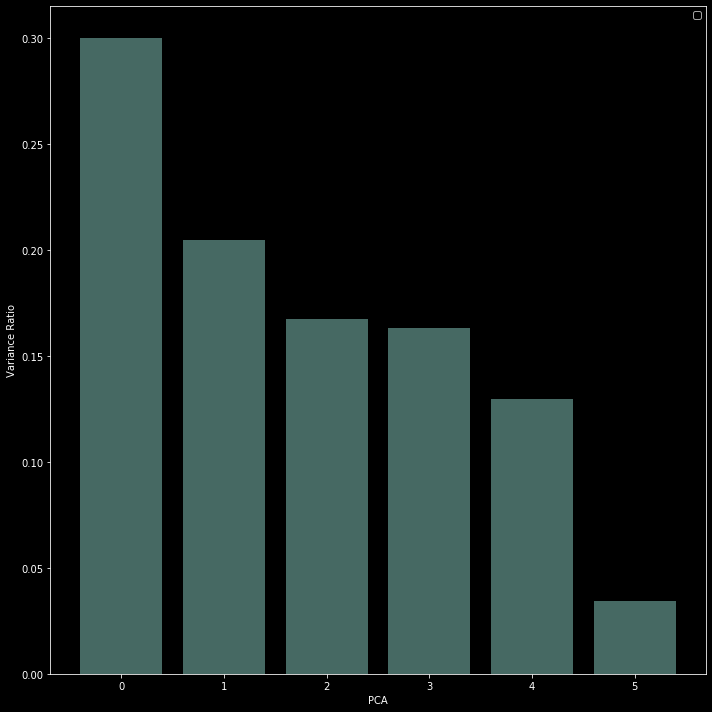

In [93]:
# Starting 2 components has the  high component other are less so others we can drop, SO we can take only starting  2 or 3 components.
with plt.style.context('dark_background'):
    plt.figure(figsize= (10,10))
    plt.bar(range(6),explained_variance,alpha = 0.5 , align = 'center')
    plt.xlabel('PCA')
    plt.ylabel('Variance Ratio')
    plt.legend(loc = 'best')
    plt.tight_layout()

In [94]:
pca = PCA(n_components = 5)
X_new = pca.fit_transform(X)
X_new

array([[-0.01221225, -1.74827045,  0.50960639, -0.41110148,  1.15793497],
       [-0.01252094, -1.77681605,  0.53746942, -0.41502514,  1.12857183],
       [-0.01267515, -1.79107699,  0.55138936, -0.41698533,  1.11390247],
       ...,
       [-1.83407039, -0.15801062,  0.73716585, -0.15999954, -0.69546787],
       [-1.83422615, -0.17241393,  0.75122475, -0.16197931, -0.71028368],
       [-1.83438114, -0.18674606,  0.76521417, -0.16394929, -0.72502627]])

In [95]:
pca.get_covariance()

array([[ 1.00001608e+00, -1.79321968e-03, -5.08815704e-04,
         2.85078360e-03,  1.84852463e-01,  9.55105884e-03],
       [-1.79321968e-03,  1.00001608e+00,  7.91350923e-01,
        -7.58632581e-02,  1.11689106e-02, -1.17822146e-02],
       [-5.08815704e-04,  7.91350923e-01,  1.00001608e+00,
        -3.18993471e-02,  2.06736733e-02, -1.66460432e-02],
       [ 2.85078360e-03, -7.58632581e-02, -3.18993471e-02,
         1.00001608e+00, -8.85280154e-02, -1.48581472e-02],
       [ 1.84852463e-01,  1.11689106e-02,  2.06736733e-02,
        -8.85280154e-02,  1.00001608e+00,  9.32433629e-02],
       [ 9.55105884e-03, -1.17822146e-02, -1.66460432e-02,
        -1.48581472e-02,  9.32433629e-02,  1.00001608e+00]])

In [98]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.30002086, 0.20478764, 0.16750837, 0.16320645, 0.1299299 ])

No handles with labels found to put in legend.


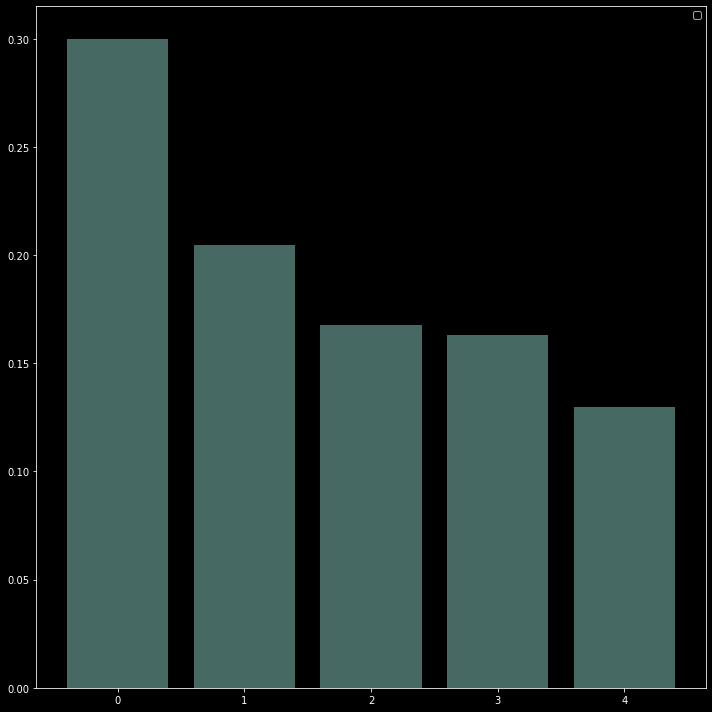

In [102]:
with plt.style.context('dark_background'):
    plt.figure(figsize = (10,10))
    plt.bar(range(5),variance_ratio  , alpha = 0.5 , align = 'center')
    plt.legend(loc = 'best')
    plt.tight_layout()

In [104]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)
X_train.shape

(49747, 6)

In [114]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# Try different n_estimators.
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
print(scores) 

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


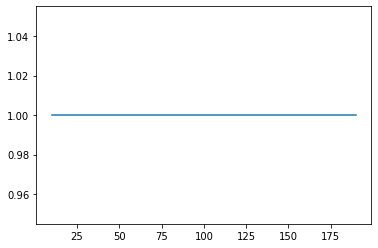

In [116]:
plt.plot(estimators , scores)

In [117]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X_new,y , test_size = 0.2 , random_state = 42)
X_train.shape

(49747, 5)

In [119]:
estimators = np.arange(10,200,10)
scores = []
for i in estimators:
    model.set_params(n_estimators = i)
    model.fit(X_train , Y_train)
    scores.append(model.score(X_test , Y_test))
print(scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999929254171043, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999980171584272, 1.0, 1.0]


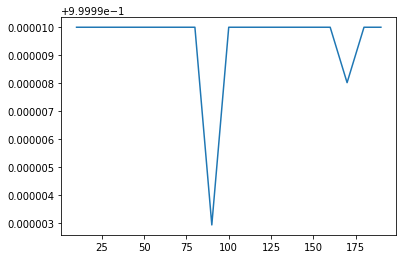

In [120]:
plt.plot(estimators , scores)